In [60]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import re; import gsw

In [62]:
import matplotlib as mpl

In [104]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

# Southern MAB

In [11]:
# Spring
temp_mean = [22.645569620253166, 27.011363636363637, 32.78260869565217, 24.903846153846153, 19.435185185185187, 21.401408450704224, 25.2, 22.596491228070175, 16.78676470588235, 24.094488188976378, 18.901408450704224, 20.914529914529915, 21.849624060150376, 20.0, 28.040816326530614, 24.647058823529413, 19.31578947368421, 15.904040404040405, 23.89189189189189, 22.416666666666668, 28.0, 27.873873873873872, 19.466666666666665, 24.53030303030303, 24.397058823529413, 20.476190476190474]
temp_std = [17.277551742728335, 20.999996890082866, 37.234340806112044, 14.82946373852467, 10.071958990648799, 19.270401313842008, 24.075179868783653, 31.09611685009544, 15.57415146644536, 19.49620763728091, 16.14590167333712, 23.0425291391931, 15.084356858258674, 14.441542145314111, 26.485425703044918, 14.36820720031767, 19.979835035593652, 14.788384927703662, 20.36902789279099, 24.998895557933473, 22.21565559544335, 26.442774272385098, 16.072503636158505, 25.485047073430188, 22.071694429497406, 15.47370119174558]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [13.594936708860759, 22.674698795180724, 23.044444444444444, 19.383838383838384, 14.40566037735849, 16.214285714285715, 20.7125, 19.5, 14.947368421052632, 20.129032258064516, 12.253731343283581, 13.366071428571429, 17.828125, 15.05813953488372, 23.928571428571427, 17.88888888888889, 15.420731707317072, 13.77127659574468, 19.542056074766354, 15.716049382716049, 29.63157894736842, 25.80392156862745, 16.788617886178862, 17.32520325203252, 19.53076923076923, 16.575]
dens_std = [10.065833282715847, 22.316519329168358, 22.528724649731824, 13.071785374292713, 8.478295315952986, 14.944879883690065, 14.757271325079895, 28.314369846828818, 15.097318540497106, 18.496744491381147, 10.850699298204853, 13.150545863170718, 13.591978513861028, 10.841483131838928, 24.92655192260367, 11.661903789690601, 14.777692007090003, 13.905941655812107, 16.922843985656304, 14.312786737652834, 29.836095742950867, 21.16977072123898, 13.489675488884645, 14.443499834124346, 18.50966161352249, 14.250851367756326]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [13.356343, 12.589188, 15.303302, 13.318162, 12.913619, 12.639998, 14.060595, 13.9939, 13.410723, 14.762077, 13.608124, 13.343668, 13.314746, 14.043632, 14.55661, 14.055724, 13.388602, 12.412607, 13.316013, 11.375993, 15.606524, 16.393677, 14.655803, 13.433977, 15.3618355, 16.0873]
glorys_std = [1.8582764, 2.919318, 6.305127, 2.0084407, 2.2118556, 1.9187373, 2.6177857, 3.7761269, 2.3714619, 3.5937963, 2.7617066, 2.7028534, 2.1863937, 2.6373916, 3.506935, 2.8477583, 2.3046257, 1.8548256, 2.0159245, 1.0721481, 5.675323, 6.2476172, 7.7501473, 3.6110764, 3.3136458, 4.466437]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [14]:
# Summer
temp_mean = [10.479166666666666, 8.553030303030303, 7.647058823529412, 8.122699386503067, 8.869565217391305, 8.173913043478262, 8.806451612903226, 9.395348837209303, 7.849056603773585, 10.512195121951219, 7.090909090909091, 9.266666666666667, 6.253333333333333, 7.881118881118881, 9.927272727272728, 7.802030456852792, 8.141304347826088, 8.267605633802816, 8.764705882352942, 8.959349593495935, 6.6, 8.380952380952381, 8.924528301886792, 7.8, 7.2439024390243905] 
temp_std = [2.534775858430538, 2.9169533251947644, 2.6368430322016874, 2.516054637709184, 4.845844966436212, 2.3786489893409564, 2.7629795610893244, 2.7872117393870863, 1.9845191862465206, 4.1965414991454555, 1.6247247889198464, 3.468837819918297, 0.7727335356493318, 2.7360131127926612, 3.2132440691415316, 2.5607707583106043, 2.415979412523859, 2.5743667541961974, 3.3864121300937278, 3.0390852106787376, 0.8944271909999159, 2.1089378956287566, 2.3521598634493492, 1.6431676725154982, 1.6090445581909478]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [8.229166666666666, 7.681818181818182, 7.244897959183674, 7.478260869565218, 8.173913043478262, 7.456521739130435, 7.903225806451613, 8.0, 7.283018867924528, 8.890243902439025, 6.745454545454545, 8.157894736842104, 6.066666666666666, 6.699300699300699, 8.899082568807339, 7.1179487179487175, 7.436781609195402, 7.359375, 7.9411764705882355, 8.008333333333333, 6.0, 6.428571428571429, 7.673076923076923, 7.4, 6.634146341463414]
dens_std = [1.9704150479005451, 2.3126541436332073, 2.385115408152, 2.2166612182563528, 4.509103659296011, 2.228168373242226, 2.5395861120085526, 2.0816659994661326, 1.7362355220702903, 3.111135307687555, 1.3363602006414983, 2.994545812840298, 0.3001501125938321, 1.8577396724604096, 3.015223577879549, 1.9952097007417329, 2.1224226472621646, 1.7581302071794414, 2.740146594863957, 2.742432929963856, 0.0, 1.0757057484009542, 1.7681401976858904, 1.6733200530681511, 1.0666793698430566]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [10.50372, 10.645221, 10.945653, 10.51267, 10.758167, 10.53024, 10.693056, 10.562223, 10.645427, 10.643091, 10.498914, 10.491995, 10.491645, 10.544239, 10.574412, 10.634314, 10.492299, 10.521432, 10.613982, 10.618012, 10.64785, 10.827015, 10.891957, 10.700449, 10.572921, 10.549558]
glorys_std = [0.38553232, 0.48558757, 0.50024325, 0.39243162, 0.44498953, 0.39493218, 0.47619486, 0.43013066, 0.52530795, 0.5688693, 0.37671575, 0.37674686, 0.37513605, 0.3907404, 0.4568923, 0.5286771, 0.37650678, 0.39020512, 0.43975347, 0.49715823, 0.5123119, 0.56696284, 0.6195273, 0.694365, 0.4034982, 0.43162158] 
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [16]:
# Fall
temp_mean = [11.428571428571429, 12.48314606741573, 17.177419354838708, 12.337209302325581, 12.012048192771084, 16.521367521367523, 20.61061946902655, 17.61946902654867, 15.982905982905983, 19.379032258064516, 14.903614457831326, 17.228813559322035, 16.67910447761194, 17.838383838383837, 16.64516129032258, 16.930434782608696, 19.57894736842105, 17.75177304964539, 15.845588235294118, 17.444444444444443, 16.50413223140496, 20.58783783783784, 14.779661016949152, 11.505747126436782, 25.818181818181817, 14.24812030075188]
temp_std = [4.649359241162534, 5.261594036788406, 8.00517085665318, 4.905244408652675, 4.511486629416653, 7.959594395529828, 11.093300446278523, 13.543131221655445, 8.807307806180543, 12.457793943960162, 6.969645786274213, 12.178453031417703, 10.019980599885663, 9.834038212527467, 8.47588021990809, 12.673858811653494, 13.696499512049513, 9.56567974462333, 12.381514702090483, 12.751951874606359, 8.341786346403019, 13.451312584994776, 9.211786943233498, 4.924720658394585, 10.524430453171153, 8.78221861856137]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [9.223684210526315, 9.68235294117647, 12.387096774193548, 10.083333333333334, 9.3875, 14.301724137931034, 15.972727272727273, 15.181818181818182, 12.191304347826087, 17.355371900826448, 11.24390243902439, 12.491071428571429, 12.452380952380953, 12.263157894736842, 12.866666666666667, 13.345454545454546, 14.7984496124031, 14.757575757575758, 12.091603053435115, 11.751824817518248, 13.791304347826086, 16.52777777777778, 10.517857142857142, 9.27710843373494, 22.727272727272727, 11.475806451612904]
dens_std = [3.883636386036593, 4.448680287739388, 6.348757045537978, 4.72167096554041, 3.9793573363203487, 7.710207607407556, 10.355567656317566, 11.579942971910265, 8.665211401612199, 13.1046171914916, 4.801134062558621, 7.078702400195086, 8.499983193260695, 6.559402097680806, 7.331219455962603, 11.438255756260277, 9.896637564219445, 9.099216652905186, 8.432948550572688, 8.09482498257357, 9.591201790835433, 13.019589567636627, 7.229795883698828, 3.9364254337426248, 8.498128136135735, 6.854425559509152]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [14.786698, 16.851925, 18.511106, 15.156162, 15.450435, 15.453477, 17.784977, 18.884493, 18.150478, 17.409363, 15.31084, 16.73281, 13.901999, 16.595701, 16.179913, 17.033484, 16.835405, 16.513866, 17.506998, 19.817364, 18.05147, 19.406366, 19.032963, 18.288914, 16.643837, 16.155764]
glorys_std = [2.6097157, 3.3188477, 3.9057636, 1.7692235, 3.507276, 1.9207516, 4.05878, 3.51871, 5.295547, 3.9704456, 2.8393028, 3.926728, 2.5660105, 2.7434046, 2.2295928, 3.8738148, 4.2402496, 3.1440036, 3.019082, 3.5364394, 3.899513, 5.5749135, 4.487034, 4.2926793, 2.8346868, 2.4267008]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [18]:
# Winter
temp_mean = [40.5735294117647, 34.5, 34.0, 31.239436619718308, 28.54237288135593, 35.847457627118644, 28.78787878787879, 45.68055555555556, 37.43157894736842, 33.19047619047619, 42.352112676056336, 52.73529411764706, 34.3125, 25.52857142857143, 41.05714285714286, 35.81818181818182, 29.28813559322034, 30.625, 31.87037037037037, 34.13333333333333, 31.0, 41.59375]
temp_std = [23.893617568121815, 25.83525338486769, 21.251890672193312, 19.23795711513524, 11.09259155363631, 20.678836056854774, 13.165824233177645, 36.864359821365724, 18.97291049330034, 23.59355161173658, 36.282659609377866, 42.098540282794296, 15.023658591046239, 12.853377640534271, 24.148908468495637, 16.30419082560681, 24.701703729777652, 18.28504713469311, 17.3336256224348, 30.649725116508208, 21.157609610833745, 25.382060435186972]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

dens_mean = [39.014925373134325, 35.046875, 35.407407407407405, 28.507042253521128, 26.79310344827586, 31.210526315789473, 26.323076923076922, 39.68571428571428, 34.229885057471265, 31.38144329896907, 32.36507936507937, 37.0625, 34.875, 25.014492753623188, 40.83, 29.568181818181817, 33.1551724137931, 28.025, 30.326923076923077, 31.142857142857142, 30.23913043478261, 47.3125]
dens_std = [25.948954867324957, 27.912806236280275, 26.744171556634768, 20.342687868081473, 11.66003614193438, 21.662786427176762, 14.231465679423724, 31.69078083705278, 19.259368695384957, 24.560063831252332, 30.551015815064307, 38.433977609930444, 15.664740371582637, 14.046658335728182, 25.142042940706375, 12.559435862150645, 27.36421130776598, 19.906818185144765, 20.348648511123802, 28.97925814435909, 24.216784613255967, 38.731030736806936]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

glorys_mean = [28.89859, 24.681742, 29.569609, 30.632637, 20.217638, 21.789711, 20.032, 31.115738, 28.02335, 27.998352, 30.681995, 30.44726, 25.967125, 20.105131, 27.190958, 25.205345, 22.945515, 36.24775, 30.155748, 22.715542, 27.79544, 29.283785, 31.382925, 28.502289, 25.871773, 24.775734, 25.064354]
glorys_std = [13.151683, 10.3551, 15.584091, 12.546687, 6.5617204, 8.637526, 6.3076563, 18.147623, 11.38287, 13.143335, 14.90781, 13.527501, 9.80529, 6.495036, 11.180669, 9.108644, 9.607383, 26.94969, 15.677735, 7.079243, 18.655209, 15.031347, 20.689566, 14.659563, 12.681555, 10.6778965, 8.983416]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019]

# Northern MAB

In [184]:
temp_mean = [20.380281690140844, 16.10576923076923, 23.0, 16.08, 17.87037037037037, 20.35135135135135, 22.65753424657534, 21.441558441558442, 15.534246575342467, 23.573333333333334, 17.139240506329113, 18.33823529411765, 19.160493827160494, 16.075949367088608, 18.916666666666668, 24.32608695652174, 25.081632653061224, 26.525, 18.069444444444443, 22.371794871794872, 24.815384615384616, 28.060606060606062, 23.55072463768116, 25.833333333333332, 33.30769230769231, 23.880597014925375]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
temp_std = [11.57135156593102, 7.943878719572516, 12.790161660202644, 8.148719694102947, 10.140608251445975, 13.417870349805003, 11.347073996412506, 13.86446945716916, 10.12571285800662, 18.12208845829007, 10.482872694476194, 12.52294645377472, 15.563142990832104, 12.020038986133642, 12.539234201744426, 13.696962601972308, 12.27324091948776, 13.74171787392618, 13.518194717468946, 11.464353533078171, 11.110091566471656, 11.914927660942855, 10.99670569906661, 12.496871403347114, 11.568125970162084, 11.411746192118201]

dens_mean = [18.56338028169014, 13.134615384615385, 21.857142857142858, 13.64, 15.37037037037037, 18.31081081081081, 19.068493150684933, 17.675324675324674, 11.698630136986301, 22.52, 12.333333333333334, 15.205882352941176, 16.864197530864196, 13.683544303797468, 15.452054794520548, 21.382978723404257, 19.0, 23.0875, 16.23611111111111, 18.115384615384617, 21.676923076923078, 25.37313432835821, 19.52173913043478, 24.560606060606062, 25.76923076923077, 21.074626865671643]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
dens_std = [11.514875341259604, 7.2661707070394845, 12.440784108877441, 7.623165553838149, 9.229354923994839, 12.330967449380838, 10.919311088265301, 12.400595866881769, 8.210232320956523, 19.098153299716166, 7.984359711335656, 11.313126471188978, 13.30202342354327, 9.77115627595659, 10.63803591924647, 13.71060839020829, 10.603982480391243, 13.521847066923431, 13.305185958712908, 11.259605733715603, 12.491381644342447, 11.68635026222385, 11.138973307388389, 11.66866782704045, 13.426265876430996, 11.54216700523966]

glorys_mean = [15.054848, 12.871663, 15.246573, 15.501311, 14.865466, 15.158664, 15.650932, 14.993918, 15.514329, 17.288504, 15.766346, 15.688725, 15.825468, 16.32246, 16.353739, 14.773034, 14.187502, 13.903833, 16.06331, 12.872959, 17.404875, 17.88274, 15.211414, 13.977979, 18.719952, 18.71914]
glorys_std = [2.9231014, 2.5206232, 3.5926476, 4.118152, 2.927525, 3.127883, 3.7099695, 3.5622096, 3.4421382, 4.0964203, 3.6585433, 4.106826, 4.0887456, 3.7756774, 3.5269482, 2.912831, 2.5516155, 2.6312246, 3.514176, 2.0750206, 5.005391, 6.26835, 10.369778, 3.4792354, 5.061653, 4.66826]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [185]:
print('temp and dens')
print(scipy.stats.pearsonr(temp_mean, dens_mean)[0])
print('temp and glorys')
print(scipy.stats.pearsonr(temp_mean, glorys_mean)[0])
print('dens and glorys')
print(scipy.stats.pearsonr(dens_mean, glorys_mean)[0])

temp and dens
0.9416144797905259
temp and glorys
0.32264795790541867
dens and glorys
0.3123551700547805


In [159]:
import matplotlib.pyplot as plt; from scipy import stats

y = temp_mean
x = temp_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = dens_mean
x = dens_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = glorys_mean
x = glorys_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)

slope: 0.351467
p_value: 0.000711
R-squared: 0.385596

slope: 0.285431
p_value: 0.004512
R-squared: 0.290305

slope: 0.073822
p_value: 0.059695
R-squared: 0.139991


In [154]:
# Spring
temp_mean = [20.64, 21.22641509433962, 28.64, 32.07692307692308, 31.103448275862068, 31.833333333333332, 28.666666666666668, 17.635135135135137, 28.529411764705884, 29.31578947368421, 15.428571428571429, 26.25, 22.963414634146343, 29.571428571428573, 20.458823529411763, 23.053333333333335, 26.42105263157895, 17.539473684210527, 30.651515151515152, 21.80701754385965, 30.8125, 21.058823529411764, 24.039473684210527, 19.333333333333332, 21.613333333333333, 28.78048780487805]
temp_std = [15.979272288096942, 15.784171123475328, 13.03482514906382, 21.67391687489479, 18.507172298794803, 24.086109952433013, 16.633299933166196, 11.413251519854494, 19.789542382493746, 24.73173967533261, 11.541591455831961, 20.93744651734463, 18.97005119964925, 13.212998650319062, 19.248100055389802, 17.07684803289936, 19.75062068755966, 15.085923495739273, 23.238888113374117, 19.281225691340293, 20.06018205937621, 13.316277190197475, 15.143263223381927, 16.185022550338168, 18.316211497020984, 18.187653110971592]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [13.224489795918368, 15.326923076923077, 23.8, 25.8, 23.666666666666668, 25.358974358974358, 21.224137931034484, 15.863013698630137, 21.852941176470587, 20.053333333333335, 12.775510204081632, 24.58108108108108, 17.9, 26.41304347826087, 16.548780487804876, 15.662162162162161, 24.82191780821918, 13.916666666666666, 21.439393939393938, 18.79245283018868, 28.604166666666668, 19.623762376237625, 20.13888888888889, 12.878378378378379, 19.183098591549296, 20.375]
dens_std = [7.388801510062511, 11.096229979532358, 14.390390312056631, 19.191834998567618, 16.91188649328941, 21.39606369852973, 14.006318252780963, 9.989320781733126, 18.757895615894302, 16.96251298737445, 10.235284774825208, 21.726826267017724, 14.588533732205446, 12.866107219195921, 15.160175606514434, 11.462000383670427, 21.629675130961363, 10.52796410371037, 16.5697860232958, 15.182680530746005, 18.280020000144248, 14.963857447295144, 14.846923668222171, 8.890433064482666, 15.585991750061911, 12.608390816727635]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [15.054848, 12.871663, 15.246573, 15.501311, 14.865466, 15.158664, 15.650932, 14.993918, 15.514329, 17.288504, 15.766346, 15.688725, 15.825468, 16.32246, 16.353739, 14.773034, 14.187502, 13.903833, 16.06331, 12.872959, 17.404875, 17.88274, 15.211414, 13.977979, 18.719952, 18.71914]
glorys_std = [2.9231014, 2.5206232, 3.5926476, 4.118152, 2.927525, 3.127883, 3.7099695, 3.5622096, 3.4421382, 4.0964203, 3.6585433, 4.106826, 4.0887456, 3.7756774, 3.5269482, 2.912831, 2.5516155, 2.6312246, 3.514176, 2.0750206, 5.005391, 6.26835, 10.369778, 3.4792354, 5.061653, 4.66826]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [22]:
# Summer
temp_mean = [8.181818181818182, 8.081632653061224, 10.392857142857142, 9.064102564102564, 6.0, 8.233333333333333, 10.363636363636363, 12.421052631578947, 7.235294117647059, 7.512820512820513, 7.111111111111111, 8.524590163934427, 8.75, 8.969696969696969, 9.692307692307692, 7.5, 9.533333333333333, 9.344827586206897, 9.93421052631579, 7.590361445783133, 7.915254237288136, 7.2, 20.0, 8.46875, 13.1, 9.458333333333334]
temp_std = [2.7539817690782895, 2.8272243064375995, 5.265817693277652, 13.253119940043858, 0.0, 2.7377732372953343, 7.486704211982513, 12.019963900267866, 1.855040827202527, 3.2352645289372757, 1.8751906221184675, 2.3707000188203846, 6.109051712050964, 3.594738449754658, 4.079175911058546, 3.5552123542372165, 5.400336689840399, 3.4874864266911034, 7.285301231595556, 2.2525657164194186, 3.2017674838213774, 1.3038404810405297, 0, 2.5940637360455634, 5.8395205282625735, 3.5012937567439972]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [7.2272727272727275, 7.346938775510204, 9.571428571428571, 6.87012987012987, 6.0, 7.517241379310345, 9.976190476190476, 9.157894736842104, 6.705882352941177, 7.3076923076923075, 6.944444444444445, 7.60655737704918, 7.513513513513513, 7.954545454545454, 9.128205128205128, 7.152, 8.976744186046512, 8.241379310344827, 9.026315789473685, 6.817073170731708, 7.175438596491228, 7.0, 19.0, 7.380952380952381, 10.3, 8.458333333333334]
dens_std = [2.091520708589536, 2.077167747279968, 5.051062018350944, 3.5958698872553385, 0.0, 3.3553868166956806, 7.690628111105212, 6.751651303321094, 1.3117119482928092, 3.1966581740594937, 1.625973815801842, 2.0678385536963484, 3.955457703685586, 3.040403911334141, 3.7779100820948694, 3.2653014483179184, 5.302687423296944, 3.1128210954717255, 6.7190747065560075, 1.6414992302693923, 2.9223449917192474, 1.4142135623730951, 0, 2.202846922101484, 3.3015148038438356, 3.078384198790385]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [10.519576, 10.553357, 10.86757, 10.505116, 10.746422, 10.502064, 10.588994, 10.523938, 10.597058, 10.561394, 10.494787, 10.522016, 10.504027, 10.507658, 10.588938, 10.496962, 10.565794, 10.567437, 10.52477, 10.516831, 10.576235, 10.653781, 10.602333, 10.497291, 10.565369, 10.506336]
glorys_std = [0.30509233, 0.31053653, 0.432637, 0.3072064, 0.3830769, 0.3000377, 0.34805456, 0.32440868, 0.4205677, 0.31767726, 0.29534253, 0.32734516, 0.29959545, 0.29727778, 0.3321211, 0.29600516, 0.36496282, 0.3250979, 0.3089074, 0.2990184, 0.3444243, 0.43988574, 0.43611088, 0.29627782, 0.3083531, 0.30003247]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [163]:
# Fall
temp_mean = [20.380281690140844, 16.10576923076923, 23.0, 16.08, 17.87037037037037, 20.35135135135135, 24.15068493150685, 21.441558441558442, 15.780821917808218, 24.333333333333332, 17.25925925925926, 18.970588235294116, 20.25925925925926, 16.075949367088608, 19.45205479452055, 25.819148936170212, 27.55, 26.525, 19.22222222222222, 22.73076923076923, 25.83076923076923, 28.074626865671643, 23.855072463768117, 25.833333333333332, 33.30769230769231, 23.880597014925375]
temp_std = [11.57135156593102, 7.943878719572516, 12.790161660202644, 8.148719694102947, 10.140608251445975, 13.417870349805003, 14.33010742077741, 13.86446945716916, 10.401985087449075, 18.564957787661616, 10.455593930736047, 14.23467553927789, 19.144044620832986, 12.020038986133642, 13.168819545395026, 16.67782170735467, 15.874746478529216, 13.74171787392618, 15.323940785234011, 11.852637469568323, 13.925661149889383, 12.068382725166014, 11.074978903603384, 12.496871403347114, 11.568125970162084, 11.411746192118201]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [18.608695652173914, 13.19, 21.735294117647058, 13.755102040816327, 15.403846153846153, 18.47945205479452, 19.068493150684933, 17.783783783783782, 11.652777777777779, 21.756756756756758, 12.333333333333334, 15.298507462686567, 16.481012658227847, 13.302631578947368, 15.452054794520548, 21.548387096774192, 19.021052631578947, 23.164556962025316, 16.608695652173914, 18.106666666666666, 21.476190476190474, 24.79032258064516, 19.402985074626866, 24.451612903225808, 25.76923076923077, 21.4]
dens_std = [11.598957092195766, 7.3122216773417, 12.606657268547877, 7.658140038125277, 9.402251744035585, 12.330077936404466, 10.919311088265301, 12.732517178705663, 8.258430983916917, 18.0401461060897, 7.984359711335656, 11.372501291157004, 12.626651462937605, 9.765271440968217, 10.63803591924647, 13.690298158718615, 10.562860415473402, 13.590560807797141, 13.469155822388238, 11.409542394752632, 12.637447096800207, 11.683163024407886, 11.276228282881322, 11.791463179490211, 13.426265876430996, 11.558005883369328]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [18.241215, 19.644905, 21.007675, 16.754456, 19.895668, 17.89298, 18.497526, 20.93133, 20.425026, 21.695145, 18.728878, 20.473356, 16.495766, 18.292526, 17.711588, 19.39352, 20.715965, 20.26855, 17.58872, 22.529211, 23.268002, 20.185848, 21.094181, 19.908503, 19.12535, 18.6215] 
glorys_std = [3.5055032, 3.3446748, 3.8110275, 1.8671991, 2.9701014, 2.5443838, 2.8775983, 2.8525994, 4.1943126, 5.065935, 3.5660365, 3.3646688, 2.6230721, 3.0371325, 2.2602055, 3.9966464, 5.593052, 2.931764, 2.1359303, 4.352764, 5.4997907, 7.1069856, 5.345065, 4.588282, 4.789659, 2.777584]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

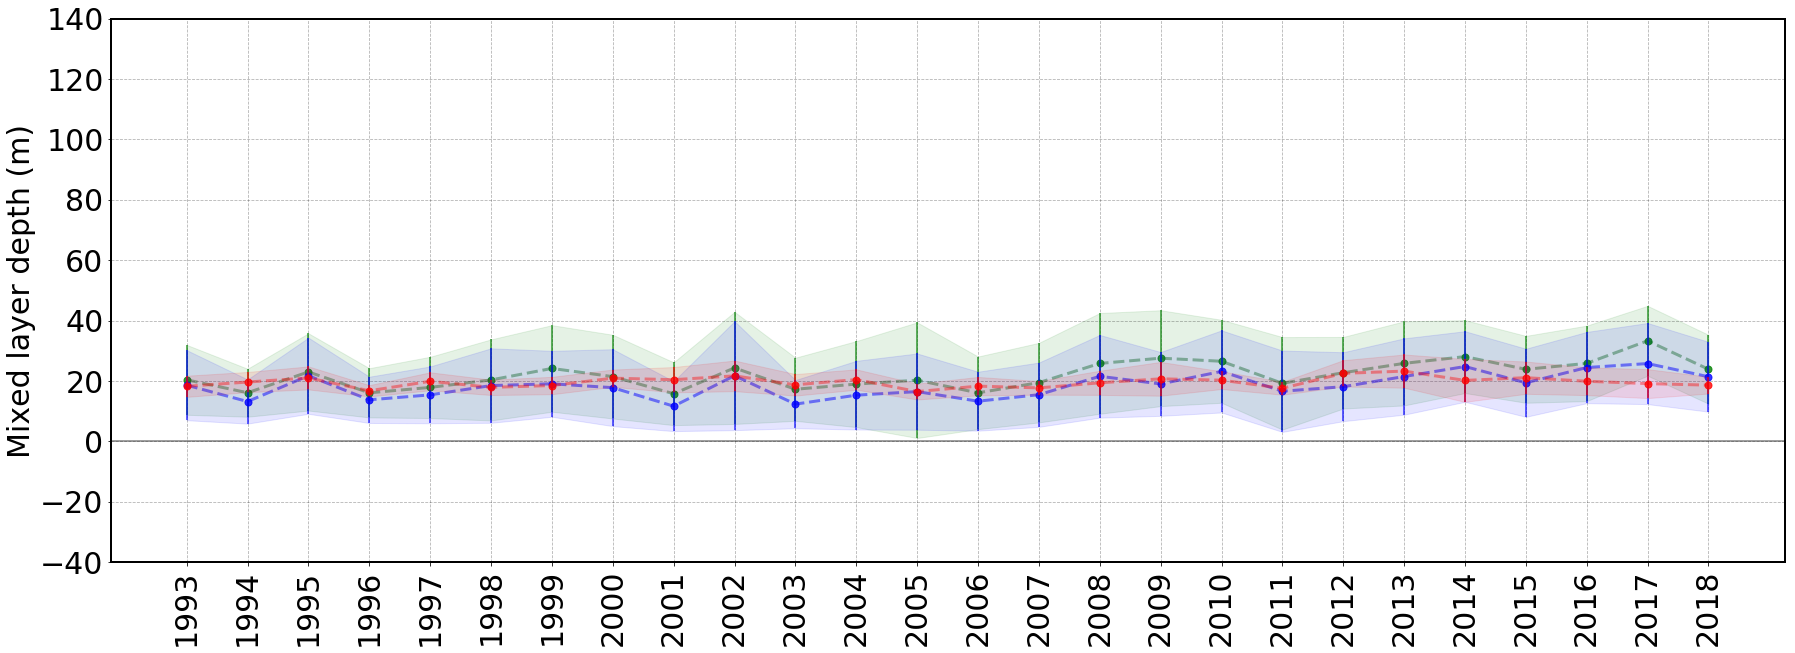

In [165]:
plt.figure(figsize=(30,10))
plt.ylim(-40,140)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)
# plt.plot(np.unique(glorys_years), np.poly1d(np.polyfit(glorys_years, glorys_mean, 1))(np.unique(glorys_mean)),c='red',linewidth = 2,linestyle = '-',zorder= 100)
# a, b = best_fit(glorys_years, glorys_mean)
# yfit = [a + b * xi for xi in glorys_years]
# plt.plot(glorys_years, yfit,color='red',linestyle='-',linewidth = 5)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
# plt.title('Fall MLD: Northern Mid-Atlantic Bight', loc='left',fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-40,-20,0,20,40,60,80,100,120,140], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

In [26]:
# Winter
temp_mean = [40.12931034482759, 33.95652173913044, 40.869565217391305, 30.53846153846154, 30.694444444444443, 43.15151515151515, 33.14705882352941, 21.92105263157895, 43.21951219512195, 40.59183673469388, 45.333333333333336, 48.425, 39.30769230769231, 41.19047619047619, 39.30555555555556, 39.54545454545455, 31.9375, 45.88235294117647, 33.68627450980392, 35.75, 36.875, 48.56521739130435]
temp_std = [18.460076862816944, 14.510072346080534, 18.923951543717962, 20.677003204972948, 12.644184308424045, 16.351837075924397, 16.933259996753346, 16.69986499208637, 15.430468808832195, 15.934656108812717, 23.91898089507209, 20.649563849618886, 15.312136965869215, 19.93065795695115, 18.340929162386583, 13.978647910388093, 17.60487011065129, 11.787936067019647, 18.022752504629732, 17.966756741996786, 19.76231041764799, 19.37389548043853]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

dens_mean = [39.724137931034484, 34.26086956521739, 40.93181818181818, 22.923076923076923, 25.416666666666668, 34.625, 31.558823529411764, 13.868421052631579, 43.32876712328767, 33.31111111111111, 46.666666666666664, 43.78947368421053, 35.84, 38.68292682926829, 36.31428571428572, 40.0, 31.71875, 47.35294117647059, 32.875, 33.75, 34.0, 51.0]
dens_std = [17.755629214860065, 15.6756200495744, 18.37009415893217, 18.443260182349707, 9.711186480402013, 13.689529787631553, 17.130853215975797, 10.016664635122702, 17.123777161953416, 16.019621806655824, 23.73263776401804, 25.333620322299453, 16.697504803612624, 22.292867720854403, 16.70289060677369, 16.631295800387896, 17.007084624336848, 13.858335972829815, 18.890079575877355, 16.403207533629036, 19.087897372077325, 19.13610399716923]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

glorys_mean = [36.770054, 31.142042, 34.29711, 39.093685, 28.30625, 35.639294, 30.135185, 35.716427, 35.736164, 35.96539, 38.25479, 35.676544, 32.146362, 30.457209, 33.116875, 32.049557, 28.020123, 33.22808, 35.838013, 26.383718, 34.4694, 34.317814, 32.79185, 30.916645, 32.117424, 30.730625, 34.82163]
glorys_std = [13.586806, 9.362513, 10.287086, 13.329326, 7.187203, 11.906981, 9.399089, 13.546092, 11.711353, 10.787596, 12.056139, 10.312755, 9.941504, 9.151605, 8.371988, 10.28359, 7.80577, 19.15445, 13.3677225, 6.3505197, 16.100842, 11.982547, 19.41875, 9.016439, 9.50956, 10.136096, 9.324479]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019]

# Georges Bank

In [182]:
# Spring - CORRECTED
temp_mean = [22.991967871485944, 23.011764705882353, 36.85585585585586, 44.60679611650485, 41.28256880733945, 41.454692556634306, 35.801310043668124, 44.03508771929825, 37.385714285714286, 35.30232558139535, 37.24096385542169, 35.02857142857143, 30.121951219512194, 34.11764705882353, 33.388888888888886, 47.05263157894737, 39.724137931034484, 37.73684210526316, 40.3859649122807, 40.17910447761194, 45.661764705882355, 32.212765957446805, 25.77, 14.74025974025974, 31.432989690721648, 29.023809523809526]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
temp_std = [18.598688812584363, 18.420337226267378, 21.904142515272436, 22.53552485982348, 23.117281080731996, 22.902718157727797, 23.18845442049386, 21.793646610456307, 22.727939045380193, 21.01711894255944, 19.328729004083836, 21.530545493181414, 22.329571337075887, 21.999002292006846, 23.403972794630086, 19.832562273084875, 22.057176978510714, 24.056871839596415, 22.297304758619298, 22.77819622859354, 22.459655566874048, 23.024004463049593, 20.671971459935893, 13.632780344876364, 21.277877408480133, 23.611808456060526]

dens_mean = [19.988372093023255, 21.814385150812065, 29.34561403508772, 40.397590361445786, 35.543571428571425, 36.630218068535825, 32.293103448275865, 35.92982456140351, 28.028985507246375, 31.035714285714285, 27.329113924050635, 30.014084507042252, 27.048780487804876, 28.72463768115942, 27.755555555555556, 41.5, 33.03389830508475, 34.280701754385966, 32.189655172413794, 34.39705882352941, 36.76470588235294, 30.20212765957447, 23.660194174757283, 13.782051282051283, 28.75257731958763, 24.166666666666668]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
dens_std = [16.867873490587694, 18.075883381678974, 20.487593829935232, 22.431613603697958, 22.48249793770788, 22.126625426503644, 22.299848323973254, 21.40415484459802, 21.68895830119472, 20.688420851166338, 17.97200209941046, 21.932684649527374, 21.042755546163857, 22.231988121233712, 21.081069366684087, 21.74488445588985, 20.34357146762695, 22.899434167966522, 21.70249957028697, 22.240973151882468, 21.870799483819916, 23.715418416996254, 19.96641955298566, 13.80819203104328, 20.948364558199533, 21.2023147936833]

glorys_mean = [19.005165, 17.468086, 17.81878, 21.906599, 24.337587, 19.344925, 19.331007, 20.431433, 20.924046, 20.40675, 18.812126, 22.220982, 20.26795, 21.801426, 23.5418, 23.376753, 18.107187, 18.098267, 20.24604, 19.46057, 23.748775, 23.588396, 22.274788, 20.050924, 22.256176, 26.24535]
glorys_std = [4.9474, 3.791209, 4.6286955, 3.943816, 6.0321417, 4.255122, 4.7291803, 5.0636044, 4.5971184, 4.0975485, 4.335348, 5.3236895, 5.2550554, 4.8691, 6.398212, 5.677149, 4.135767, 3.611465, 4.7061224, 5.5135465, 5.042746, 4.8273335, 6.828121, 4.5319824, 5.0282807, 5.9931626]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [183]:
print('temp and dens')
print(scipy.stats.pearsonr(temp_mean, dens_mean)[0])
print('temp and glorys')
print(scipy.stats.pearsonr(temp_mean, glorys_mean)[0])
print('dens and glorys')
print(scipy.stats.pearsonr(dens_mean, glorys_mean)[0])

temp and dens
0.9560288273285314
temp and glorys
0.12640918425622077
dens and glorys
0.15003956771620044


In [135]:
import matplotlib.pyplot as plt; from scipy import stats

y = temp_mean
x = temp_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = dens_mean
x = dens_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = glorys_mean
x = glorys_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)

slope: -0.160651
p_value: 0.435787
R-squared: 0.025507

slope: -0.118762
p_value: 0.480839
R-squared: 0.020920

slope: 0.131541
p_value: 0.023979
R-squared: 0.194850


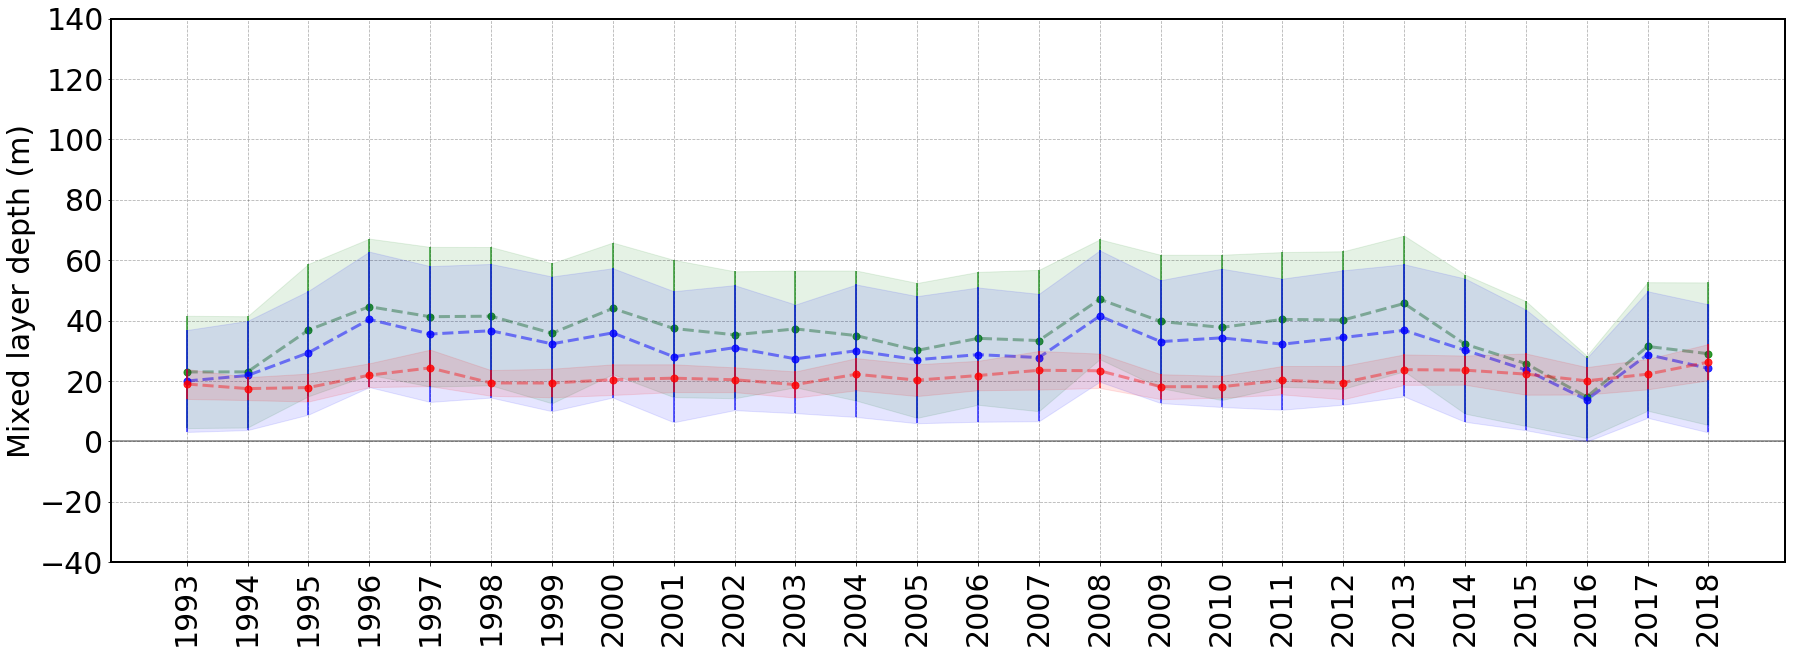

In [137]:
plt.figure(figsize=(30,10))
plt.ylim(-40,140)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-40,-20,0,20,40,60,80,100,120,140], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

In [32]:
# Summer
temp_mean = [16.22093023255814, 21.682142857142857, 20.07829181494662, 19.737704918032787, 17.23835616438356, 16.005405405405405, 17.15111111111111, 17.637795275590552, 15.065040650406504, 13.68421052631579, 12.439024390243903, 17.317460317460316, 13.182432432432432, 13.874015748031496, 13.492857142857142, 15.080808080808081, 19.86080586080586, 18.127819548872182, 14.880434782608695, 13.165217391304347, 15.84, 13.121951219512194, 16.28125, 19.046875, 13.904761904761905, 16.073170731707318]
temp_std = [21.386307418692923, 17.76799009720047, 18.24459583196303, 19.031744291259887, 16.8952319749113, 14.487624890596209, 16.863271350331782, 16.007274780369805, 13.99867665724413, 12.870571350695336, 10.471710934734226, 17.05128771378903, 14.090589884554985, 14.369827365270835, 13.128307834528792, 15.59282721525612, 16.742503878240754, 20.185658550532995, 15.621795419111693, 13.235339744565715, 13.743479629381794, 12.870887929648092, 16.87761329824692, 18.70949991060055, 15.826890919901993, 16.270203200793834]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [11.012048192771084, 18.003597122302157, 17.7864768683274, 17.752475247524753, 15.145890410958904, 14.783783783783784, 15.419642857142858, 16.341269841269842, 12.56910569105691, 12.928571428571429, 11.524390243902438, 15.211382113821138, 11.979452054794521, 12.672, 12.428571428571429, 13.666666666666666, 17.940959409594097, 15.045454545454545, 14.811111111111112, 11.921052631578947, 13.123711340206185, 10.282051282051283, 15.34375, 17.38095238095238, 13.380952380952381, 16.025641025641026]
dens_std = [9.94557626370445, 15.698075993639653, 17.032027457966574, 17.956573409787126, 15.371985835019668, 14.31807753508908, 15.864978715638472, 15.537908584317362, 11.362204603682814, 13.768166891871246, 10.244210180204227, 16.043614751782464, 13.749216493329502, 13.725873848437695, 12.19514165390833, 14.73103895765434, 16.429541522260433, 15.594999999443761, 16.63075156533718, 12.289390155194274, 12.340024422550423, 9.96031260857102, 16.391597719760316, 18.47791058868676, 15.828696062772165, 16.934062806394223]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [10.671555, 10.659716, 11.139045, 10.557141, 11.338085, 10.630441, 10.624901, 10.600217, 10.602863, 10.766074, 10.581306, 10.576504, 10.575117, 10.617575, 10.7778225, 10.577658, 10.566132, 10.751994, 10.5517435, 10.6320715, 10.671964, 10.859977, 10.608155, 10.615633, 10.791532, 10.561761]
glorys_std = [0.28403783, 0.18261322, 0.7389918, 0.115271404, 0.6845291, 0.1625474, 0.21661846, 0.16955008, 0.13044024, 0.3234013, 0.115825385, 0.113603614, 0.13060834, 0.22151741, 0.28090623, 0.08135027, 0.10704906, 0.34386283, 0.07483379, 0.18368341, 0.24265757, 0.6126265, 0.20465165, 0.20527315, 0.36961192, 0.1017044]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [36]:
# Fall
temp_mean = [33.30578512396694, 39.043956043956044, 26.62857142857143, 29.635416666666668, 34.11940298507463, 35.340425531914896, 39.83561643835616, 24.707070707070706, 28.663793103448278, 31.969072164948454, 26.283870967741937, 30.779661016949152, 25.414414414414413, 20.235294117647058, 21.46808510638298, 24.57983193277311, 30.13953488372093, 33.15135135135135, 29.54, 30.452830188679247, 38.84146341463415, 33.86666666666667, 31.535353535353536, 34.607142857142854, 24.61904761904762, 22.125]
temp_std = [16.722162427552348, 21.748007361039406, 18.647008456311372, 20.710088968609462, 16.966564613665547, 20.51149858032133, 17.366965527363003, 15.837988769741557, 17.9365761676439, 17.884731388491357, 17.470849501982006, 18.74030146580912, 19.169326098302545, 12.741614477600487, 13.983632619601778, 17.75038591049541, 18.58373961039534, 17.94644238726932, 18.39324645492239, 16.49423106969262, 18.43605532926128, 20.421550959458088, 16.780280659345078, 16.899358321791738, 14.259607481622835, 16.309576105076204]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [29.26050420168067, 33.86666666666667, 24.771428571428572, 22.458333333333332, 31.454545454545453, 29.20212765957447, 35.71232876712329, 21.181818181818183, 26.92982456140351, 25.526315789473685, 20.335526315789473, 26.974137931034484, 20.862385321100916, 18.457831325301203, 19.511111111111113, 19.896551724137932, 26.37984496124031, 27.58011049723757, 25.1340206185567, 26.524271844660195, 32.839506172839506, 26.42, 28.979166666666668, 31.036363636363635, 19.40983606557377, 16.581818181818182]
dens_std = [17.547254449818556, 18.280707581024355, 18.588557065611965, 18.451596232000416, 17.77308407346675, 17.020910471354064, 16.657063443388743, 14.942313317312259, 18.736514583294593, 15.238418766229021, 15.669578270166234, 17.96250258873676, 16.06783530207468, 13.381185558343164, 13.094509051159054, 14.022577639584346, 17.651218884280347, 16.739522161935948, 17.40966497977212, 16.365820828065925, 16.630135890998798, 18.588135675177, 16.35203458557128, 17.974223968581434, 13.658180758773998, 13.618738328862687]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [23.463305, 24.41853, 24.513355, 20.693663, 23.917994, 22.383003, 24.968985, 23.644793, 25.341732, 28.007435, 22.573946, 24.76346, 20.89475, 20.619873, 19.761477, 23.655218, 26.168701, 23.694418, 21.303492, 25.76854, 24.50167, 23.132696, 26.204338, 29.945593, 23.90439, 25.820255]
glorys_std = [4.4138737, 3.4646883, 3.5316124, 3.8671403, 3.9738977, 4.33392, 3.8089528, 4.2435265, 4.2305474, 3.7077243, 2.850134, 3.5885053, 3.0345564, 3.1331646, 3.4232712, 3.499382, 4.380353, 3.2212534, 3.0750008, 3.770061, 3.363268, 4.4465775, 6.7247977, 6.9488773, 3.8205752, 3.5962148]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [38]:
# Winter
temp_mean = [45.15094339622642, 42.3780487804878, 56.1375, 55.350515463917525, 55.10671140939597, 52.43181818181818, 43.66504854368932, 15.5, 52.86666666666667, 46.0, 36.5, 40.416666666666664, 47.34285714285714, 52.189189189189186, 47.333333333333336, 50.166666666666664, 44.256410256410255, 39.68888888888889, 44.53846153846154, 45.46875, 50.833333333333336, 53.4375]
temp_std = [20.02156706750368, 20.352231802817492, 17.556955237602843, 22.52944704578607, 17.900002508038217, 23.139680637979602, 19.294114905784927, 2.0816659994661326, 18.88391640657665, 25.337718918639855, 23.717082451262844, 27.480433810699612, 17.598366998344005, 22.820358646804145, 4.273952113286562, 17.649767299153996, 20.27536481431533, 20.12892787442335, 22.221243301088126, 17.59212502522722, 17.819546343385344, 15.345352348827882]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

dens_mean = [38.82911392405063, 35.19512195121951, 53.98717948717949, 53.5699481865285, 50.775838926174494, 43.988832487309644, 39.45631067961165, 11.75, 46.86666666666667, 36.19047619047619, 36.7, 37.54545454545455, 44.68571428571428, 47.08571428571429, 43.666666666666664, 48.166666666666664, 47.22857142857143, 38.888888888888886, 40.4, 40.266666666666666, 47.82608695652174, 46.29032258064516]
dens_std = [17.762119945050273, 18.081734200937124, 21.455174406760456, 24.32091282246895, 20.256482616038745, 22.20155990928272, 19.908952122480038, 2.5, 22.087183572400523, 21.987767161808513, 19.652819984249927, 16.675512803890836, 16.37927569427011, 23.152145661676713, 7.004760286167305, 19.100486156864473, 19.94269100121014, 18.886289185330167, 24.27176857997785, 14.850829149807819, 13.302946269403643, 19.497339217419892]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

glorys_mean = [39.0049, 39.191357, 39.055115, 46.6183, 44.331924, 38.344147, 38.98975, 44.797253, 41.91232, 44.936153, 49.442474, 44.528538, 40.13777, 40.498833, 40.167133, 39.9718, 41.700718, 39.95164, 43.61991, 39.64479, 44.87744, 42.824303, 45.56318, 40.791397, 43.042374, 44.363457, 51.483032]
glorys_std = [12.763689, 10.216573, 10.105525, 12.362383, 11.237961, 9.204937, 11.877417, 9.267653, 10.675496, 11.142955, 10.309052, 11.279501, 12.39917, 9.4904995, 9.113417, 11.097881, 10.069179, 11.415239, 9.5730915, 10.908127, 10.490206, 10.495303, 12.797247, 10.350098, 12.022437, 9.9154415, 12.848905]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Eastern Gulf of Maine

In [117]:
temp_mean = [42.58620689655172, 36.041666666666664, 38.476190476190474, 36.55769230769231, 51.16851851851852, 33.05692307692308, 32.95384615384615, 58.7, 47.08571428571429, 40.37837837837838, 38.955555555555556, 36.483870967741936, 38.63636363636363, 34.96666666666667, 52.0, 35.48571428571429, 43.67567567567568, 23.225806451612904, 25.51851851851852, 31.304347826086957, 42.45454545454545, 25.244897959183675, 23.596153846153847, 25.205882352941178, 32.68571428571428, 36.35294117647059]
temp_mean2 = [42.58620689655172, 36.041666666666664, 32.095238095238095, 34.76, 41.256, 30.087692307692308, 32.95384615384615, 56.714285714285715, 45.26470588235294, 34.714285714285715, 36.84090909090909, 36.483870967741936, 38.63636363636363, 33.0, 52.0, 35.48571428571429, 29.727272727272727, 20.9, 25.51851851851852, 23.093023255813954, 36.95454545454545, 22.104166666666668, 20.098039215686274, 16.235294117647058, 26.38235294117647, 15.0]

In [180]:
# Spring # CORRECTED
temp_mean = [42.58620689655172, 36.041666666666664, 32.095238095238095, 34.76, 41.256, 30.087692307692308, 32.95384615384615, 56.714285714285715, 45.26470588235294, 34.714285714285715, 36.84090909090909, 36.483870967741936, 38.63636363636363, 33.0, 52.0, 35.48571428571429, 29.727272727272727, 20.9, 25.51851851851852, 23.093023255813954, 36.95454545454545, 22.104166666666668, 20.098039215686274, 16.235294117647058, 26.38235294117647, 15.0]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
temp_std = [31.313526563017586, 24.741233259245707, 22.54730476977132, 27.432708021406768, 31.338130650264723, 21.895272803823342, 30.34047975129038, 21.793402234446575, 39.24538870694694, 21.681615183717053, 23.68685552655163, 18.134444146875, 20.30058216809647, 31.33573952260536, 23.294745357919723, 29.74239539838063, 24.84863266770519, 16.52657212512312, 24.369543366149557, 19.044826761002295, 24.998051872147904, 16.42162505672158, 19.574733614494768, 25.777672772134355, 20.387183594159367, 12.878126954109197]

dens_mean = [29.17241379310345, 22.125, 20.857142857142858, 21.21153846153846, 25.637037037037036, 20.172307692307694, 21.96923076923077, 28.0, 12.0, 23.675675675675677, 19.822222222222223, 20.2, 33.515151515151516, 16.166666666666668, 38.5625, 25.142857142857142, 20.054054054054053, 14.64516129032258, 15.333333333333334, 17.043478260869566, 20.954545454545453, 18.79591836734694, 15.26923076923077, 10.058823529411764, 21.4, 14.117647058823529]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
dens_std = [22.11991501778632, 16.055102128227837, 16.425101890869218, 15.57063165500188, 22.367499133123946, 13.888231390419953, 19.35762868900885, 14.151885459858892, 8.228358423947098, 12.890681505245162, 16.69279769689596, 14.384857939202405, 14.109219530419667, 8.047631192847492, 19.651705171028603, 18.966135233997615, 10.865199149235718, 7.245910971468779, 14.79864858694874, 11.211019423840954, 10.28858485677104, 16.625757616617975, 15.717001391169216, 4.1701767746164915, 17.136476403549587, 12.205953224457607]

glorys_mean = [16.214684, 14.84083, 17.24754, 17.893175, 28.963285, 15.233452, 18.646948, 17.124601, 17.295416, 16.60712, 17.531559, 15.996353, 20.256195, 19.91482, 20.571943, 19.956385, 14.798963, 14.638611, 18.205349, 16.734022, 18.02096, 20.03858, 20.470596, 19.7065, 22.701674, 18.780113]
glorys_std = [2.8110106, 2.0660563, 4.4955378, 1.8048618, 5.9015846, 1.6163552, 4.971642, 3.3831348, 1.7382497, 1.9910387, 3.4363358, 2.5814316, 2.81911, 3.271787, 6.020949, 2.7006054, 2.6226676, 1.7438073, 2.3092036, 3.6217992, 3.2868173, 3.5286517, 6.4306016, 1.5634578, 7.758365, 4.871824]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [181]:
print('temp and dens')
print(scipy.stats.pearsonr(temp_mean, dens_mean)[0])
print('temp and glorys')
print(scipy.stats.pearsonr(temp_mean, glorys_mean)[0])
print('dens and glorys')
print(scipy.stats.pearsonr(dens_mean, glorys_mean)[0])

temp and dens
0.7075898999945193
temp and glorys
0.04446777633262685
dens and glorys
0.19599540883231845


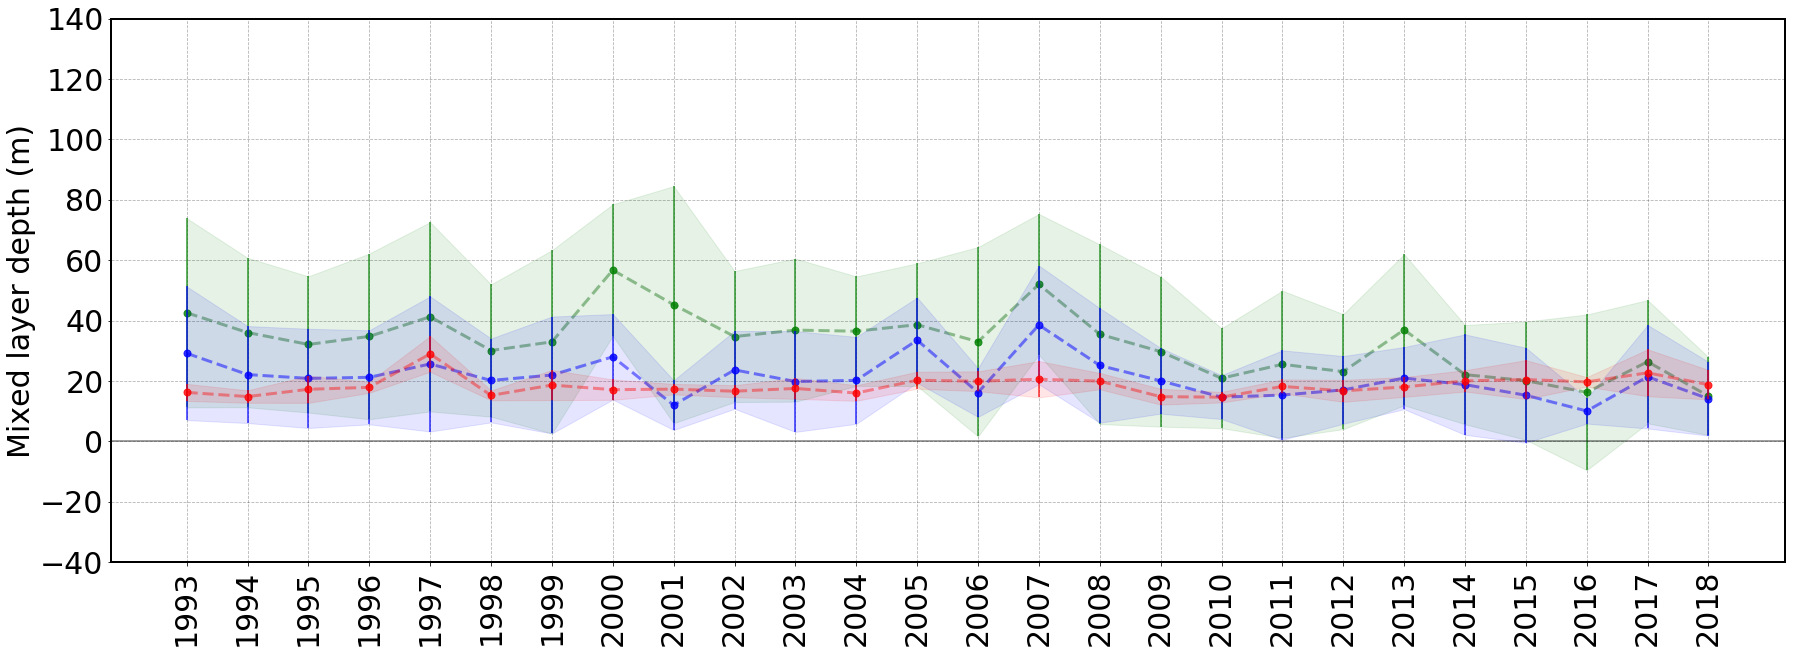

In [124]:
plt.figure(figsize=(30,10))
plt.ylim(-40,140)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
# plt.title('Spring MLD: Eastern Gulf of Maine', loc='left',fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-40,-20,0,20,40,60,80,100,120,140], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

In [178]:
# Summer - CORRECTED 
temp_mean = [8.125, 8.192307692307692, 10.18918918918919, 12.23728813559322, 8.35483870967742, 9.72340425531915, 10.142857142857142, 14.9, 10.189655172413794, 11.022222222222222, 9.045454545454545, 8.952380952380953, 7.9, 8.625, 8.555555555555555, 9.605263157894736, 9.461538461538462, 13.022222222222222, 13.92, 10.105263157894736, 11.714285714285714, 9.4, 10.727272727272727, 11.964285714285714, 9.307692307692308, 20.533333333333335]
temp_std = [4.665437208646805, 2.926010673517522, 5.596813765377969, 14.665628339350492, 3.488537297080007, 4.89543766156228, 9.136198874265483, 29.178037883600776, 4.936284903744687, 4.91976019781863, 2.902827402104184, 3.9196340107419374, 3.2878954378532796, 3.3793300807810702, 3.5846896657869842, 4.168994134205325, 14.967753800960043, 20.38436219807287, 6.769539619993864, 8.918736437922291, 6.435393205879942, 6.542170893518451, 3.6902820784029258, 7.198158935692658, 5.250152622934172, 28.63780385301585]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [7.166666666666667, 7.653846153846154, 8.594594594594595, 11.916666666666666, 7.838709677419355, 8.48936170212766, 8.25, 8.95, 8.864406779661017, 9.088888888888889, 8.136363636363637, 7.790697674418604, 7.829268292682927, 7.825, 8.061728395061728, 8.473684210526315, 6.938461538461539, 9.066666666666666, 10.807692307692308, 8.631578947368421, 10.047619047619047, 7.6, 9.454545454545455, 10.586206896551724, 8.666666666666666, 7.428571428571429]
dens_std = [2.057154359296116, 2.8557634032574577, 3.5548047255280615, 14.629076765320828, 3.3575464672242274, 4.090669874055029, 3.433789319528659, 5.020746432239145, 4.450717211163426, 3.396670978675111, 2.3154852324020254, 2.9805571509757294, 3.5489606860628244, 3.0372685096974883, 3.2914498287697844, 3.318554244842198, 2.4992306508511466, 3.1866197536802936, 4.825094658298266, 5.927436454655301, 4.271723194171065, 3.5777087639996634, 3.531674853766591, 6.167409976060282, 4.4986770542121866, 1.3985864135061359]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [10.603919, 10.781447, 10.610981, 10.571529, 10.602375, 10.634841, 10.554851, 10.6136265, 10.536321, 10.750168, 10.586325, 10.563595, 10.539227, 10.564226, 10.674993, 10.540619, 10.546909, 10.631228, 10.584113, 10.628252, 10.5399275, 10.552327, 10.545934, 10.557322, 10.573357, 10.564694]
glorys_std = [0.0648534, 0.17100823, 0.064677976, 0.039215118, 0.09832737, 0.079382956, 0.03605246, 0.07221098, 0.009227885, 0.11820523, 0.053742196, 0.040940177, 0.01654152, 0.056879632, 0.14046581, 0.012057903, 0.017370656, 0.08876739, 0.06413164, 0.0685181, 0.029614188, 0.033846516, 0.024654558, 0.029730195, 0.032109637, 0.03519865]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [179]:
print('temp and dens')
print(scipy.stats.pearsonr(temp_mean, dens_mean)[0])
print('temp and glorys')
print(scipy.stats.pearsonr(temp_mean, glorys_mean)[0])
print('dens and glorys')
print(scipy.stats.pearsonr(dens_mean, glorys_mean)[0])

temp and dens
0.32561388309820527
temp and glorys
-0.10995176038459967
dens and glorys
-0.0998353624563855


In [92]:
# Summer
temp_mean = [8.125, 8.192307692307692, 10.18918918918919, 14.95, 8.35483870967742, 9.72340425531915, 10.142857142857142, 17.0, 16.71186440677966, 11.022222222222222, 9.045454545454545, 18.46511627906977, 12.21951219512195, 8.625, 8.555555555555555, 9.605263157894736, 11.723076923076922, 18.622222222222224, 28.5, 10.105263157894736, 11.714285714285714, 9.4, 10.727272727272727, 15.862068965517242, 28.066666666666666, 14.214285714285714]
temp_std = [4.665437208646805, 2.926010673517522, 5.596813765377969, 25.553151651450627, 3.488537297080007, 4.89543766156228, 9.136198874265483, 38.519987976169084, 35.06105553786956, 4.91976019781863, 2.902827402104184, 43.87989497166387, 27.848260443986398, 3.3793300807810702, 3.5846896657869842, 4.168994134205325, 32.76359817517935, 39.982546697328324, 53.52177127113788, 8.918736437922291, 6.435393205879942, 6.542170893518451, 3.6902820784029258, 22.14840229312108, 62.018967912666696, 15.43312407393003]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [7.0, 7.368421052631579, 8.958333333333334, 11.903846153846153, 7.107142857142857, 8.121212121212121, 8.076923076923077, 9.153846153846153, 8.962962962962964, 8.53125, 8.666666666666666, 7.538461538461538, 8.125, 6.913043478260869, 7.875, 8.709677419354838, 6.528301886792453, 8.08695652173913, 8.25, 9.0, 9.923076923076923, 7.6, 7.5, 8.764705882352942, 10.5, 7.125]
dens_std = [2.3204774044612857, 2.7327342090495996, 4.216728246099015, 15.479600257523773, 1.5948826896203976, 3.0619394972547194, 3.295807667042731, 5.474884379999177, 5.049611420552625, 3.0372353196775475, 2.29128784747792, 3.1398187110821443, 4.245841955730745, 2.4847360108225303, 3.1999002644031984, 3.5514649408105456, 1.749766727143778, 2.661391356521842, 2.5628464289109907, 6.838803314120883, 3.817973687301037, 3.5777087639996634, 1.9748417658131499, 3.7671177935642306, 6.715653356152326, 0.9910312089651149]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [10.603919, 10.781447, 10.610981, 10.571529, 10.602375, 10.634841, 10.554851, 10.6136265, 10.536321, 10.750168, 10.586325, 10.563595, 10.539227, 10.564226, 10.674993, 10.540619, 10.546909, 10.631228, 10.584113, 10.628252, 10.5399275, 10.552327, 10.545934, 10.557322, 10.573357, 10.564694]
glorys_std = [0.0648534, 0.17100823, 0.064677976, 0.039215118, 0.09832737, 0.079382956, 0.03605246, 0.07221098, 0.009227885, 0.11820523, 0.053742196, 0.040940177, 0.01654152, 0.056879632, 0.14046581, 0.012057903, 0.017370656, 0.08876739, 0.06413164, 0.0685181, 0.029614188, 0.033846516, 0.024654558, 0.029730195, 0.032109637, 0.03519865]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [148]:
import matplotlib.pyplot as plt; from scipy import stats

y = temp_mean
x = temp_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = dens_mean
x = dens_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = glorys_mean
x = glorys_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)

slope: 0.135970
p_value: 0.053536
R-squared: 0.146594

slope: 0.020123
p_value: 0.523222
R-squared: 0.017188

slope: -0.003235
p_value: 0.043472
R-squared: 0.159194


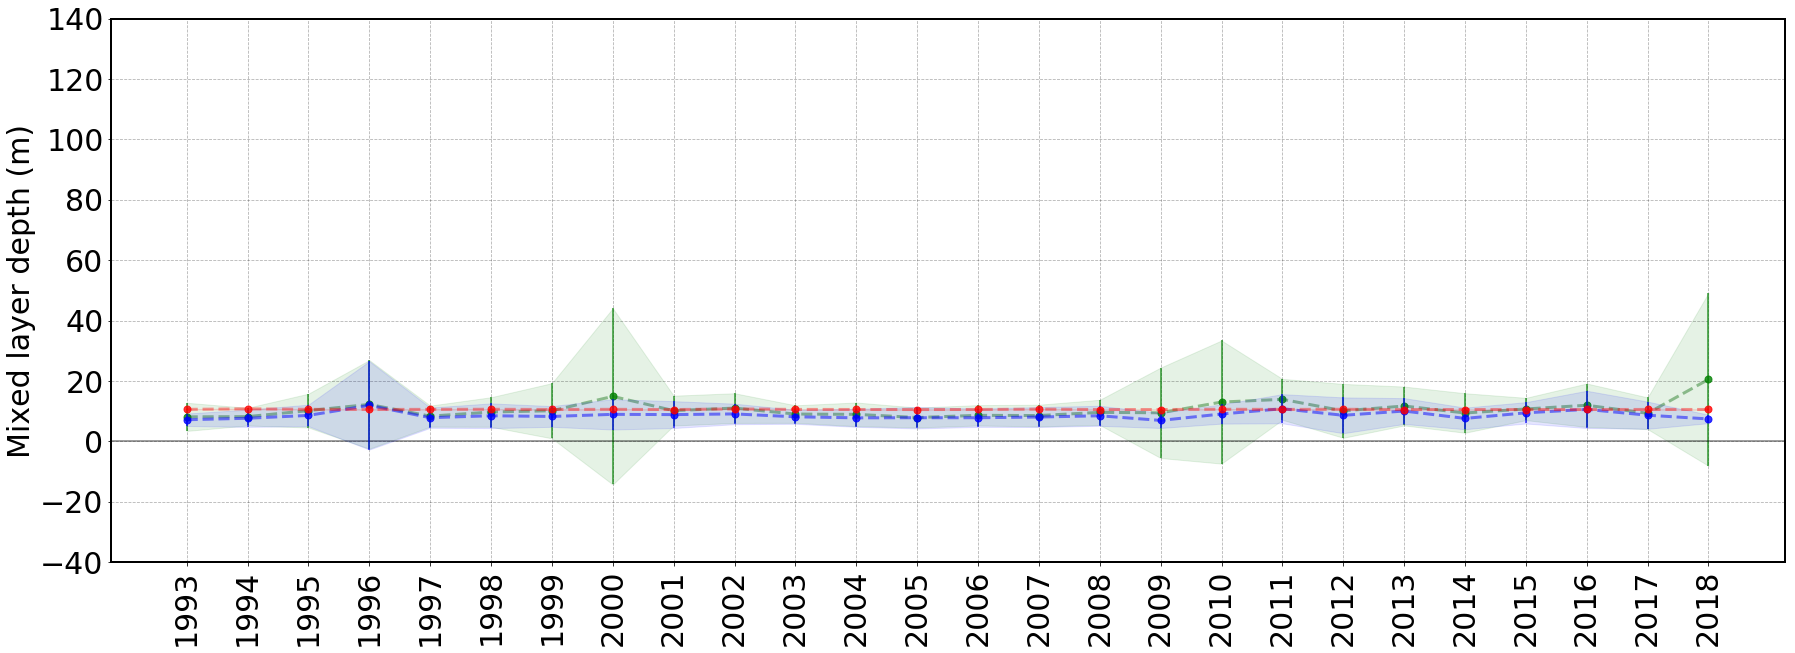

In [150]:
plt.figure(figsize=(30,10))
plt.ylim(-40,140)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-40,-20,0,20,40,60,80,100,120,140], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

In [44]:
# Fall
temp_mean = [43.45, 25.606060606060606, 20.8, 29.794871794871796, 49.70967741935484, 28.488372093023255, 67.30232558139535, 26.916666666666668, 24.513513513513512, 38.836363636363636, 24.164556962025316, 26.19736842105263, 25.094594594594593, 28.615384615384617, 27.692307692307693, 23.258823529411764, 29.753424657534246, 39.116883116883116, 34.0, 30.35135135135135, 42.595238095238095, 37.610169491525426, 35.21621621621622, 34.54054054054054, 40.30769230769231, 40.0] 
temp_std = [21.068812776112274, 16.63756929726251, 9.213344359444854, 16.449571242499857, 31.125759480305156, 13.748371493213046, 45.124449546159056, 16.197504589583467, 19.584900000614287, 30.3862564183971, 15.340937673801342, 18.946957354215375, 17.638818429441915, 25.667823492403148, 18.255926329656518, 16.001601810575142, 25.27283391197278, 30.350571843209853, 26.706652411316323, 21.160464837083246, 20.866660915125017, 26.826400371039888, 26.969257328314416, 17.506498150043527, 23.726389073382794, 14.120906486483083]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [34.111111111111114, 16.82608695652174, 15.75, 18.652173913043477, 26.545454545454547, 21.14814814814815, 39.74074074074074, 17.916666666666668, 20.78787878787879, 21.0, 19.58974358974359, 18.5, 18.166666666666668, 18.0, 20.771428571428572, 18.047619047619047, 15.0, 24.232558139534884, 18.55, 24.17142857142857, 32.5, 21.176470588235293, 20.473684210526315, 20.35, 28.76923076923077, 30.5]
dens_std = [19.54547622918513, 11.987312132997666, 6.497252166438187, 12.219986220986778, 15.484945908318497, 11.511545053365753, 15.766548309127321, 14.790682395152892, 15.89960214863405, 12.967195076351253, 12.447189386232305, 13.927903161872088, 12.876334882255897, 8.361165642964556, 11.209464788308857, 9.953433972822427, 8.023613797932848, 15.505509327029117, 13.720806328922126, 13.925190281276155, 17.255052654375273, 14.843569341709529, 9.794377191093036, 10.70796555447343, 15.562528961974904, 21.91650823770368]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [23.93502, 19.933065, 21.19783, 19.36952, 19.474545, 19.49511, 25.690977, 20.994905, 22.78601, 27.776234, 21.946707, 21.674675, 21.11088, 20.219233, 19.746824, 20.411667, 22.676876, 24.870586, 20.132664, 22.10745, 20.079147, 16.740314, 26.084274, 21.57006, 21.648006, 24.259436]
glorys_std = [2.835996, 3.3975127, 2.966733, 2.4640682, 3.976932, 3.422367, 2.2839346, 3.9354053, 1.6211804, 2.9053187, 1.795107, 2.1341515, 2.125777, 4.130733, 3.1852658, 2.1906376, 5.7537026, 3.4975867, 2.9371743, 2.1269176, 2.6841745, 1.5422198, 2.6505165, 6.0474105, 3.0152564, 3.7400885]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [46]:
# Winter
temp_mean = [32.6, 31.88888888888889, 50.6, 75.25833333333334, 55.55238095238095, 52.5625, 45.2, 46.5, 52.86666666666667, 52.42857142857143, 51.53846153846154, 56.142857142857146, 29.0, 42.9, 53.23076923076923, 59.75, 43.0]
temp_std = [7.861297602813419, 21.477454359202675, 32.342610352976216, 30.06082119660893, 43.72124905635267, 27.233681115427164, 22.609100569713704, 29.5550334122633, 24.694900186842126, 21.957000936145402, 29.951670472655845, 37.412168203277524, 12.727922061357855, 20.930712764789096, 36.683679037036455, 28.98706608127149, 25.369272752682527]
temp_years = [1993, 1995, 1996, 1997, 1998, 1999, 2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

dens_mean = [30.0, 21.0, 47.42857142857143, 76.16, 45.5, 37.608695652173914, 28.666666666666668, 17.428571428571427, 38.1, 36.857142857142854, 89.5, 53.25, 27.0, 41.333333333333336, 51.0, 79.5, 65.5]
dens_std = [5.744562646538029, 16.327890249508663, 21.570482476887584, 33.082274062447055, 16.057708429287164, 22.412940925916363, 24.270695636233146, 6.214422549122937, 21.24173041706139, 20.440389521961755, 40.30508652763321, 33.240286801811244, 9.899494936611665, 30.71590250451168, 40.31542302064228, 19.091883092036785, 7.7781745930520225]
dens_years = [1993, 1995, 1996, 1997, 1998, 1999, 2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

glorys_mean = [36.623253, 45.914562, 28.295898, 36.86922, 43.71068, 28.728888, 47.80346, 47.24041, 31.644535, 43.648006, 43.233067, 49.13547, 46.15124, 46.728214, 45.910736, 36.866432, 47.40409, 34.760696, 32.080605, 51.63476, 38.12856, 32.89712, 48.961903, 44.920334, 38.559666, 55.58722]
glorys_std = [17.42651, 12.726294, 7.7920547, 7.80366, 7.2819386, 7.5425477, 16.845074, 16.727495, 5.1232467, 12.891962, 10.125938, 12.19878, 8.7177105, 7.959933, 15.92185, 10.885306, 12.928996, 6.59589, 8.6439, 12.0752735, 8.771833, 9.670065, 11.005652, 8.077707, 12.507925, 15.86834]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# Western Gulf of Maine

In [176]:
# Spring CORRECTED
dens_mean = [24.77777777777778, 22.076923076923077, 22.365853658536587, 21.696202531645568, 39.538823529411765, 16.1803738317757, 34.455555555555556, 26.5, 9.648148148148149, 17.76595744680851, 22.21875, 25.26875, 13.925925925925926, 13.650176678445229, 40.20754716981132, 25.955223880597014, 22.059701492537314, 12.418181818181818, 17.85185185185185, 15.621301775147929, 14.692307692307692, 17.846153846153847, 17.096385542168676, 8.566666666666666, 13.436363636363636, 10.783783783783784]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
dens_std = [21.036644315108912, 13.71588517277957, 23.252694572415663, 15.48643279709591, 36.32436573731863, 10.598900256695703, 37.34026988796235, 15.2567765523793, 4.344406107912588, 9.605733717890551, 14.48531686784603, 34.66945837966931, 10.661998332442147, 8.837052774637236, 46.13248417103724, 28.359399508442014, 18.594460397798606, 5.714474503855875, 15.952059555214484, 10.573935642037979, 13.149290709154094, 20.82833914498373, 13.01370240135404, 2.4308836669612246, 9.249151385224557, 3.2070680200590203]

temp_mean = [31.51219512195122, 29.43243243243243, 25.897435897435898, 38.60526315789474, 47.74938271604938, 23.645, 37.8433734939759, 45.696969696969695, 20.07843137254902, 22.093023255813954, 35.62068965517241, 30.748387096774195, 15.474418604651163, 15.202898550724637, 46.745098039215684, 29.92063492063492, 30.45, 13.117647058823529, 19.6734693877551, 24.18633540372671, 19.233333333333334, 18.5, 17.846153846153847, 9.172413793103448, 15.11320754716981, 15.783783783783784]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
temp_std = [21.5755903177868, 20.265653127809543, 26.323688423162324, 31.17908655808395, 40.895204863947036, 21.345538057155995, 40.56024784877335, 40.816268852386585, 17.815547296959362, 14.74192911309903, 37.82778501068067, 37.85011340860141, 12.637950802173465, 14.018771529781633, 51.36101367272842, 32.58057089110584, 30.175433379837596, 6.022116102578991, 16.404252186427712, 23.35224961565376, 22.60895777676212, 20.40069912013223, 13.77092450194836, 2.5364340198289828, 9.369878862525571, 24.657808246223095]

glorys_mean = [22.567114, 18.913176, 18.764471, 19.165308, 29.113565, 14.747943, 25.429754, 21.93917, 16.017096, 23.260954, 22.65577, 17.083418, 23.785368, 23.897976, 26.469152, 22.738518, 20.615736, 18.465754, 22.181524, 20.003044, 22.982174, 26.837084, 29.14387, 19.05772, 36.336433, 26.108059]
glorys_std = [6.036619, 3.781576, 7.208805, 3.540857, 6.963559, 2.6641815, 5.6733646, 5.212365, 2.7092028, 6.260203, 5.9608006, 6.0090017, 4.466255, 3.5413916, 6.8464513, 4.1565237, 5.963527, 2.8520381, 3.2418656, 3.5849235, 5.695122, 8.029004, 8.271338, 3.1549542, 10.354675, 8.110586]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [177]:
print('temp and dens')
print(scipy.stats.pearsonr(temp_mean, dens_mean)[0])
print('temp and glorys')
print(scipy.stats.pearsonr(temp_mean, glorys_mean)[0])
print('dens and glorys')
print(scipy.stats.pearsonr(dens_mean, glorys_mean)[0])

temp and dens
0.9025479284773469
temp and glorys
0.022175675231587443
dens and glorys
0.20501743054972996


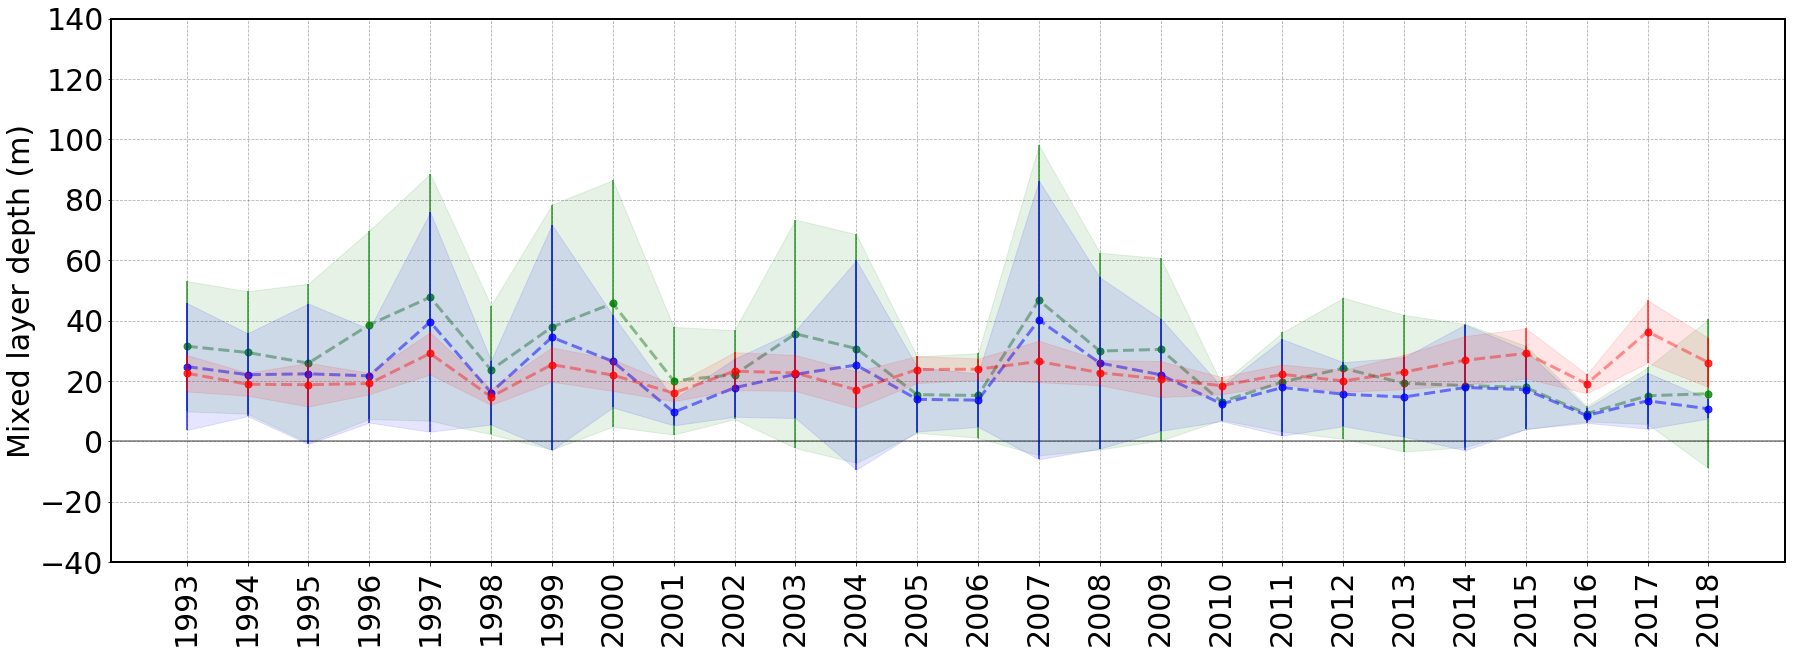

In [132]:
plt.figure(figsize=(30,10))
plt.ylim(-40,100)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
# plt.title('Spring MLD: Western Gulf of Maine', loc='left',fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-40,-20,0,20,40,60,80,100,120,140], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

In [174]:
# Summer - CORRECTED
temp_mean = [7.579710144927536, 9.640625, 9.128571428571428, 7.544444444444444, 8.196551724137931, 8.63888888888889, 9.25, 10.205128205128204, 8.754098360655737, 11.23076923076923, 7.103448275862069, 8.62962962962963, 8.140625, 10.161764705882353, 8.7, 9.394736842105264, 7.96078431372549, 9.734375, 10.203703703703704, 7.148148148148148, 9.25925925925926, 9.875, 13.473684210526315, 9.364864864864865, 8.458333333333334, 11.027777777777779]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
temp_std = [2.0176121377207066, 7.670531505145427, 3.9633152151732793, 2.3567312685496833, 2.697429934523535, 2.78374097869719, 3.403014615686549, 5.7453848168471024, 3.784423063492937, 5.113613053559925, 2.041442549945764, 3.743151211521259, 3.356430395524388, 4.209478622367451, 3.1184114218490104, 7.567853327260664, 2.856296793498361, 7.294795247189101, 5.093020120546149, 1.7419075144676224, 4.381715440261976, 5.166858675387646, 7.890700722669492, 3.4663720101851716, 3.2701438163649845, 4.239178566731404]

dens_mean = [6.826086956521739, 8.375, 8.2, 6.934065934065934, 7.26551724137931, 7.953703703703703, 8.5, 9.666666666666666, 7.672131147540983, 10.076923076923077, 6.931034482758621, 7.925925925925926, 7.859375, 9.470588235294118, 8.12, 8.81578947368421, 7.764705882352941, 8.4375, 9.24074074074074, 6.685185185185185, 7.851851851851852, 7.75, 11.789473684210526, 8.283783783783784, 7.583333333333333, 10.055555555555555]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
dens_std = [1.6623558914908758, 6.508846239164002, 3.2951435499068555, 1.8245376753955314, 1.9262318204238318, 2.863677076962083, 3.078079965040941, 5.022755237460671, 2.2339897901543018, 4.01679167802058, 1.791468561240004, 3.4578423409384733, 3.1965615827606, 4.261842458532702, 2.8474120007545123, 7.0590377690412645, 3.4674961300288, 3.642234618455134, 4.637562734906738, 1.4383438336946155, 3.3247753388960066, 3.2841611235921855, 6.860344560252066, 3.1121514835752664, 3.063340981839027, 3.771657039736888]

glorys_mean = [10.557171, 10.63424, 10.574132, 10.537667, 10.610738, 10.571807, 10.547891, 10.595048, 10.531682, 10.601068, 10.536478, 10.528733, 10.528156, 10.528228, 10.571844, 10.528971, 10.53265, 10.628394, 10.540097, 10.559637, 10.529024, 10.537056, 10.532693, 10.537149, 10.549033, 10.534485]
glorys_std = [0.05994575, 0.11196062, 0.078126624, 0.041703533, 0.11625248, 0.065425865, 0.04297835, 0.08599193, 0.038926903, 0.091127716, 0.04327904, 0.038136315, 0.03805744, 0.037953004, 0.08020722, 0.037850723, 0.03756523, 0.09558046, 0.040501516, 0.054111354, 0.038382214, 0.04482719, 0.03870042, 0.04445958, 0.046098147, 0.043720137]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

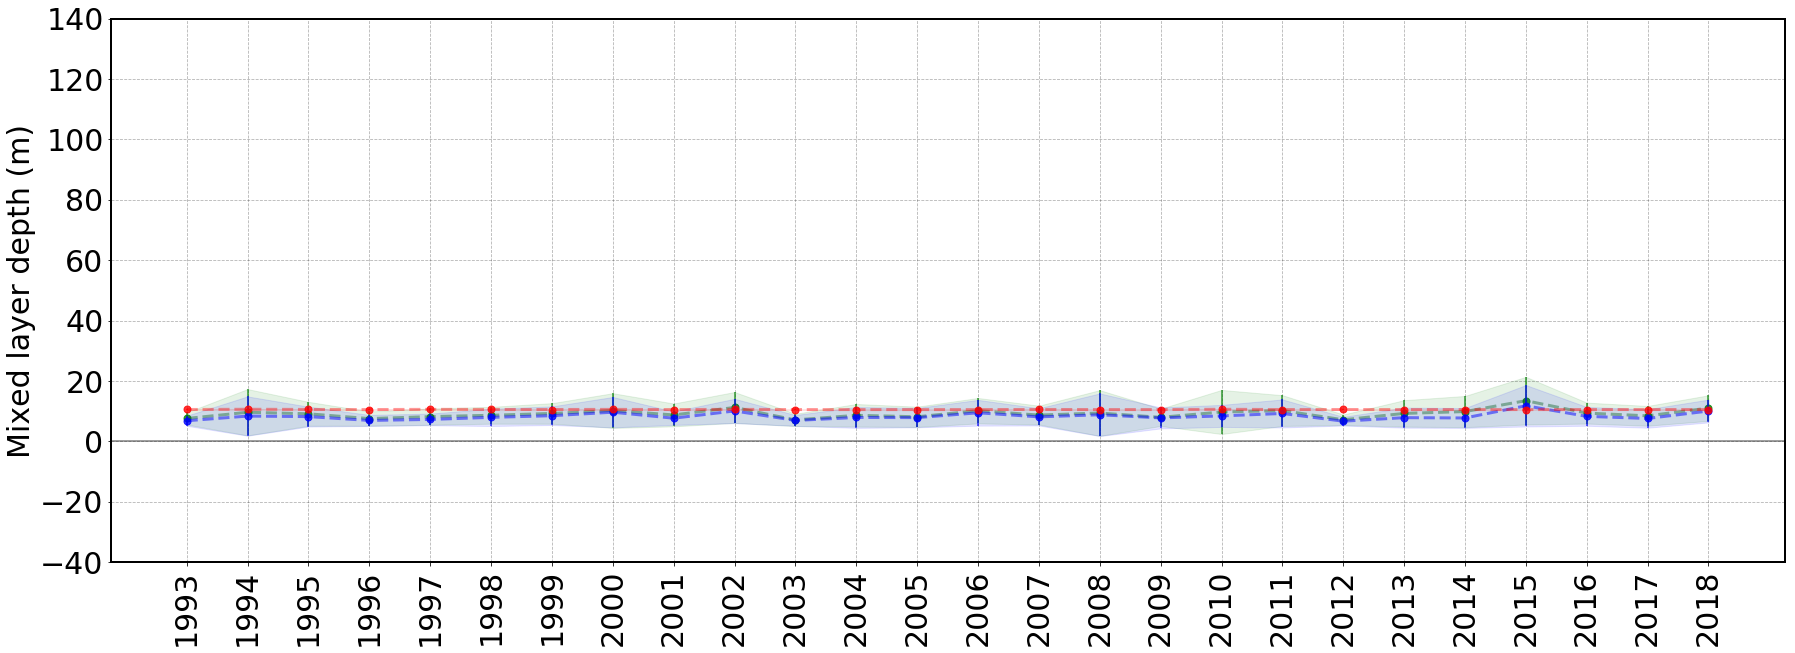

In [146]:
plt.figure(figsize=(30,10))
plt.ylim(-40,140)

mean_temp_asarray = np.asarray(temp_mean)
std_temp_asarray = np.asarray(temp_std)
mean_dens_asarray = np.asarray(dens_mean)
std_dens_asarray = np.asarray(dens_std)
mean_glorys_asarray = np.asarray(glorys_mean)
std_glorys_asarray = np.asarray(glorys_std)

plt.plot(glorys_years, glorys_mean, linestyle='--', color='red', linewidth=3,alpha = 0.4, zorder= 30)
plt.errorbar(glorys_years,glorys_mean, glorys_std,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=7, zorder = 30)
plt.fill_between(glorys_years, mean_glorys_asarray - std_glorys_asarray, mean_glorys_asarray + std_glorys_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.3)

plt.plot(temp_years, temp_mean, linestyle='--', color='darkgreen', linewidth=3,alpha = 0.4)
plt.errorbar(temp_years,temp_mean, temp_std,linestyle='None', marker='o',markersize=7,color='green',alpha= 0.8)
plt.fill_between(temp_years, mean_temp_asarray - std_temp_asarray, mean_temp_asarray + std_temp_asarray,color = 'green', alpha = 0.1)

plt.plot(dens_years, dens_mean, linestyle='--', color='blue', linewidth=3,alpha = 1.5,zorder=25)
plt.errorbar(dens_years,dens_mean, dens_std,linestyle='None', marker='o',markersize=7,color='blue',alpha= 0.8,zorder=25)
plt.fill_between(dens_years, mean_dens_asarray - std_dens_asarray, mean_dens_asarray + std_dens_asarray,color = 'blue', alpha = 0.1,zorder=25)

# plt.xlabel('Time', fontsize = 30)
plt.ylabel('Mixed layer depth (m)', fontsize = 30)
plt.xticks(glorys_years, rotation = 90, fontsize = 30) 
plt.yticks([-40,-20,0,20,40,60,80,100,120,140], fontsize = 30) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.savefig('seasonal_EasternGoM')
plt.show()

In [54]:
# Fall
temp_mean = [30.09722222222222, 30.29032258064516, 22.509090909090908, 32.372093023255815, 34.45, 33.776595744680854, 39.10344827586207, 28.095744680851062, 22.033112582781456, 27.418032786885245, 23.5, 30.1588785046729, 23.782258064516128, 22.45679012345679, 24.387323943661972, 24.968553459119498, 36.314516129032256, 42.157534246575345, 21.795348837209303, 24.255555555555556, 41.455555555555556, 39.32941176470588, 39.15068493150685, 33.851851851851855, 32.56, 37.87755102040816]
temp_std = [13.72584661923302, 21.535625913838523, 11.404795494412, 15.008269494341254, 17.812036494118146, 18.51599381605294, 21.956105514559717, 19.109232778855272, 15.997673671940783, 22.6835361579057, 12.304042981240373, 20.233611832467936, 16.1444498172078, 12.799019161484637, 13.92729275803719, 17.422312692058007, 27.43813942099421, 29.06418304282945, 17.47320984758507, 16.0933457994055, 26.87430630873159, 25.34118999502876, 18.256407728122863, 15.123900125182853, 18.568307430035905, 23.263555773159105]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

dens_mean = [23.868852459016395, 16.851063829787233, 19.093023255813954, 21.04225352112676, 27.979591836734695, 24.452380952380953, 31.77027027027027, 19.0609756097561, 17.984126984126984, 19.97872340425532, 17.9, 24.232558139534884, 15.358695652173912, 15.71311475409836, 21.204918032786885, 18.43220338983051, 20.532608695652176, 28.13131313131313, 15.095541401273886, 17.70344827586207, 34.208333333333336, 30.27777777777778, 25.915254237288135, 28.073170731707318, 23.818181818181817, 27.1]
dens_std = [11.169117258220044, 9.859841085685288, 11.328039282048627, 12.631521364901051, 13.07588396616453, 13.786150516732155, 17.940958952774277, 12.064996365852737, 14.010843872934492, 13.867249824951536, 10.925505327748766, 15.640576504046548, 9.35100808074374, 8.207514706422655, 11.85723514145846, 10.676661033772398, 11.394476285605244, 17.494982642056158, 10.331544576044793, 10.590302257995699, 22.29187782357979, 23.432385331334046, 12.983129817114287, 14.237960254022411, 13.841751346497537, 18.199464630051974]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

glorys_mean = [21.597424, 22.389051, 22.12987, 20.370592, 20.46043, 22.522831, 21.482239, 25.863453, 21.895205, 26.473404, 19.01525, 23.104399, 18.995882, 19.6898, 19.348469, 18.977125, 23.828, 25.897291, 19.565905, 22.847889, 22.575975, 18.30427, 25.332966, 25.407742, 22.041843, 23.946249]
glorys_std = [2.5731556, 1.9978379, 2.463038, 1.9683537, 3.0533066, 2.6294174, 2.746695, 2.5534017, 2.6579697, 3.1549578, 2.4216678, 2.412844, 2.18397, 2.6283436, 1.7661653, 2.4021204, 3.790321, 3.1477122, 2.0235498, 2.1342049, 2.6002736, 2.3049088, 3.4741054, 3.456912, 3.2325478, 3.3617315]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [56]:
# Winter
temp_mean = [48.06896551724138, 63.92857142857143, 107.31818181818181, 75.84615384615384, 85.5, 71.12068965517241, 77.2, 83.3125, 103.0, 95.125, 125.8, 55.791666666666664, 82.21739130434783, 68.82758620689656, 79.10714285714286, 63.5, 59.23076923076923, 73.74074074074075, 94.76190476190476, 86.85714285714286]
temp_std = [28.710290632059785, 32.68606921731521, 45.74607593229679, 51.752368953582135, 21.474372322996235, 38.58397501656378, 33.16949478987259, 35.465887366125024, 58.063183975160484, 41.41924156027692, 47.622323696830605, 30.341504314354143, 27.549882893232596, 38.03744135649214, 36.297473930793224, 34.57474574712388, 25.251094797286285, 23.832093088284566, 46.09761898613068, 56.1548095657232]
temp_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

dens_mean = [40.407407407407405, 42.833333333333336, 96.72222222222223, 50.666666666666664, 82.90714285714286, 76.13636363636364, 39.3448275862069, 72.5, 100.0, 67.8, 92.36363636363636, 31.333333333333332, 84.46153846153847, 65.675, 69.52380952380952, 56.779661016949156, 47.101694915254235, 65.77272727272727, 87.57894736842105, 71.0]
dens_std = [27.941228511149088, 24.052341913317953, 35.643340365604075, 56.67450926121902, 21.674493091965285, 39.821034707737134, 30.259916747677195, 36.9693220012319, 55.36545252531883, 20.72920644887305, 26.684350197344987, 21.74746838030535, 31.902495682457676, 46.040889017681465, 38.29832770189718, 35.450338161224614, 28.389346541928933, 26.138699312161684, 48.285396676052514, 53.978831829841276]
dens_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

glorys_mean = [69.84296, 63.21864, 53.576622, 57.144676, 46.89673, 43.018883, 54.938457, 69.281944, 57.10536, 61.02901, 74.82897, 73.54988, 58.497498, 49.587315, 65.68672, 58.829464, 58.16361, 49.398014, 56.400593, 52.88323, 65.880295, 56.42779, 56.598885, 60.41635, 66.69943, 63.90192, 57.475647]
glorys_std = [16.666883, 12.312315, 16.353022, 13.334975, 8.240325, 10.2294855, 11.417693, 14.374917, 16.642996, 11.927784, 16.519014, 14.723171, 11.806565, 10.604153, 13.998396, 14.339996, 11.556932, 7.4145694, 14.283459, 10.73429, 10.505907, 13.598846, 10.570808, 13.295955, 14.995041, 17.144146, 11.204289]
glorys_years = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [57]:
import matplotlib.pyplot as plt; from scipy import stats

y = temp_mean
x = temp_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = dens_mean
x = dens_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)
print('')
y = glorys_mean
x = glorys_years
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f" % (slope))
print("p_value: %f" % p_value)
print("R-squared: %f" % r_value**2)

slope: 0.193496
p_value: 0.762857
R-squared: 0.005187

slope: 0.391487
p_value: 0.569649
R-squared: 0.018295

slope: 0.045780
p_value: 0.817288
R-squared: 0.002176
